In [1]:
import sys
import os
sys.path.append(os.path.abspath('../'))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.linear_model import LinearRegression

from collections import Counter

In [3]:
from dynamo.explore_longitudinal_characteristics_vector import LongitudinalCharacteristics

In [4]:
wd = './data/data_original/ready_files/'

In [5]:
male_df = pd.read_csv(wd + 'male_rarefied_18000_interpolated_pchip.tsv', sep = '\t', index_col = [0]).T
female_df = pd.read_csv(wd + 'female_rarefied_18000_interpolated_pchip.tsv', sep = '\t', index_col = [0]).T
donorA_df = pd.read_csv(wd + 'donorA_rarefied_18000_interpolated_pchip.tsv', sep = '\t', index_col = [0]).T
donorB_df = pd.read_csv(wd + 'donorA_rarefied_18000_interpolated_pchip.tsv', sep ='\t', index_col = [0]).T

donorB_df = LongitudinalCharacteristics.filter_dataset(donorB_df)

datasets = [male_df, female_df, donorA_df, donorB_df]
subjects = ['male', 'female', 'donorA', 'donorB']


In [6]:
lch_object = LongitudinalCharacteristics(datasets, subjects)

In [7]:
df = pd.read_csv('./data/data_original/ts_charactericstics_tables/LONGITUDINAL_CHARACTERISTICS_DF.csv')

df['ADF_stat'] = np.where(df['ADF_pvalue'].isna(), 'undefinded', df['ADF_stat'])
df['KPSS_stat'] = np.where(df['KPSS_pvalue'].isna(), 'undefinded', df['KPSS_stat'])

df['stationary'] = np.where(df['ADF_stat'] == 'undefinded', 'undefinded', df['stationary'])
df['stationary'] = np.where(df['stationary'] == 'undefinded', '2', df['stationary'])

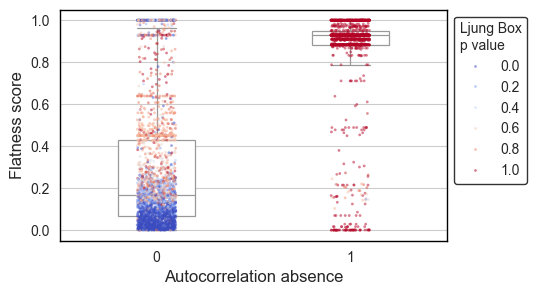

In [8]:
LongitudinalCharacteristics.plot_white_noise_tests(df)

D:\AGH-Infa\Sano\dynamo_library\dynamo\explore_longitudinal_characteristics_vector.py:94: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(y=df[y_vars[0]],


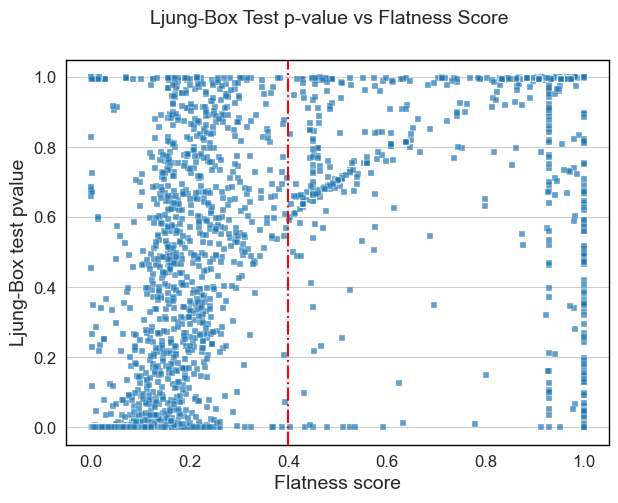

In [9]:
LongitudinalCharacteristics.plot_white_noise(
    df=df, 
    x_vars=['flattness_score'], 
    y_vars=['ljung_box_noise'], 
    xlabel='Flatness score', 
    ylabel=['Ljung-Box test pvalue'], 
    palette={0: '#0077b6', 1: '#ffd166'}, 
    vertical_line_x=0.4,
    plot_type='single',  
    fig_title='Ljung-Box Test p-value vs Flatness Score'
)

## 1b. WHITE NOISE vs PCA LOADING

D:\AGH-Infa\Sano\dynamo_library\dynamo\explore_longitudinal_characteristics_vector.py:65: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[x_vars[0]],
D:\AGH-Infa\Sano\dynamo_library\dynamo\explore_longitudinal_characteristics_vector.py:74: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[x_vars[1]],


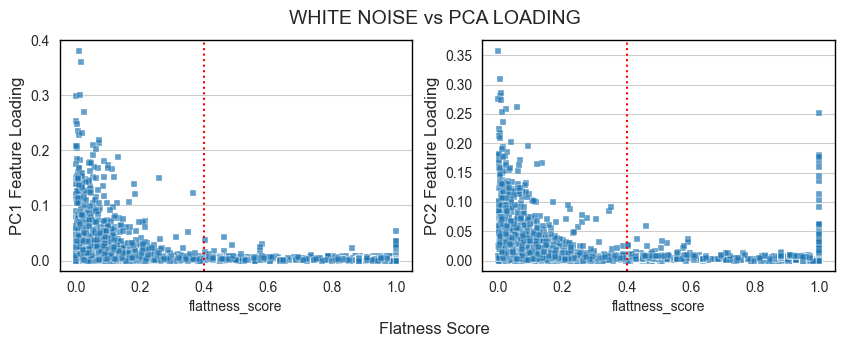

In [10]:
LongitudinalCharacteristics.plot_white_noise(
    df=df, 
    x_vars=['flattness_score', 'flattness_score'], 
    y_vars=['PC1_loading', 'PC2_loading'], 
    xlabel='Flatness Score', 
    ylabel=['PC1 Feature Loading', 'PC2 Feature Loading'], 
    palette={0: '#0077b6', 1: '#ffd166'}, 
    vertical_line_x=0.4, 
    plot_type='double', 
    fig_title='WHITE NOISE vs PCA LOADING'
)

## 1c. LjungBox test pvalue vs PCA loadings

D:\AGH-Infa\Sano\dynamo_library\dynamo\explore_longitudinal_characteristics_vector.py:65: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[x_vars[0]],
D:\AGH-Infa\Sano\dynamo_library\dynamo\explore_longitudinal_characteristics_vector.py:74: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[x_vars[1]],


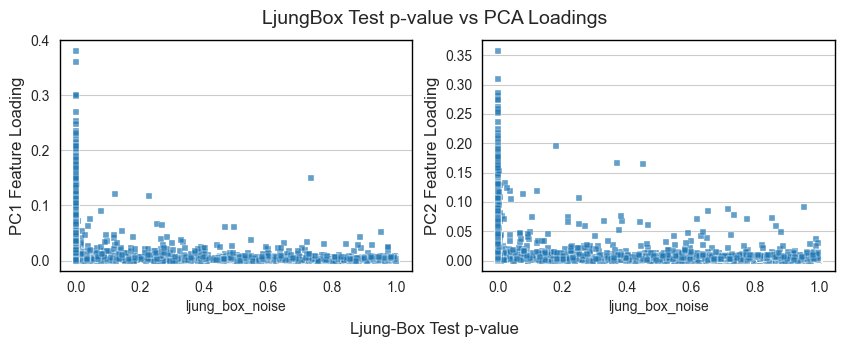

In [11]:
LongitudinalCharacteristics.plot_white_noise(
    df=df, 
    x_vars=['ljung_box_noise', 'ljung_box_noise'], 
    y_vars=['PC1_loading', 'PC2_loading'], 
    xlabel='Ljung-Box Test p-value', 
    ylabel=['PC1 Feature Loading', 'PC2 Feature Loading'], 
    palette={0: '#0077b6', 1: '#ffd166'}, 
    plot_type='double', 
    fig_title='LjungBox Test p-value vs PCA Loadings'
)

## 1d. white noise vs PCA loadings boxplots

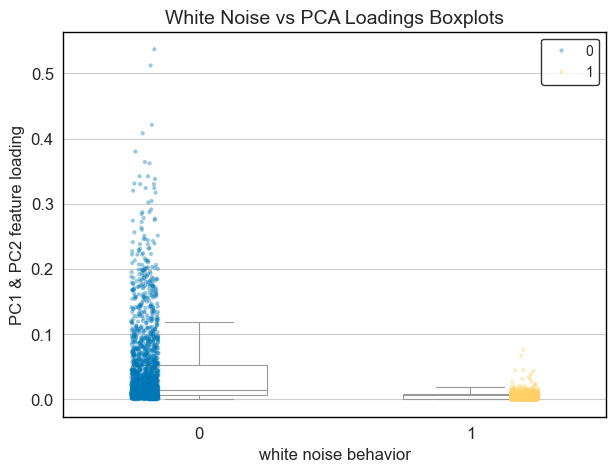

In [12]:
df['loading'] = df.PC1_loading + df.PC2_loading
LongitudinalCharacteristics.plot_boxplot(
    df=df,
    x_var='white_noise_binary',
    y_var='loading',
    hue_var='white_noise_binary',  
    xlabel='white noise behavior',
    ylabel='PC1 & PC2 feature loading',
    palette=['#0077b6', '#ffd166'],
    stripplot=True,
    fliersize=0, 
    width=.5, 
    linewidth=.8,
    stripplot_params={
        's': 3,
        'alpha': 0.4,
        'edgecolor': 'k'
    },
    fig_title='White Noise vs PCA Loadings Boxplots'
)

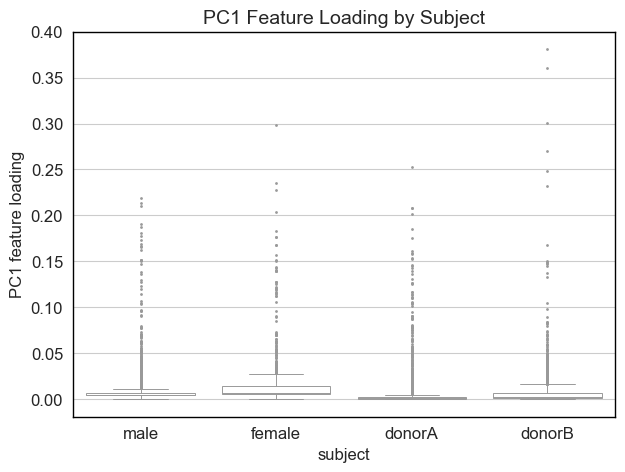

In [13]:
LongitudinalCharacteristics.plot_boxplot(
    df=df,
    x_var='subject',
    y_var='PC1_loading',
    hue_var='white_noise_binary',
    fliersize = 1, 
    width=.8,
    xlabel='subject',
    ylabel='PC1 feature loading',
    palette={0: '#0077b6', 1: '#ffd166'}, 
    legend_params={
        'title': 'white noise \nbehavior',
        'edgecolor': 'k'
    },
    fig_title='PC1 Feature Loading by Subject'
)

## 1d. white noise per person

In [14]:
WHITE_NOISE_DF = lch_object.aggregate_white_noise_data(df)

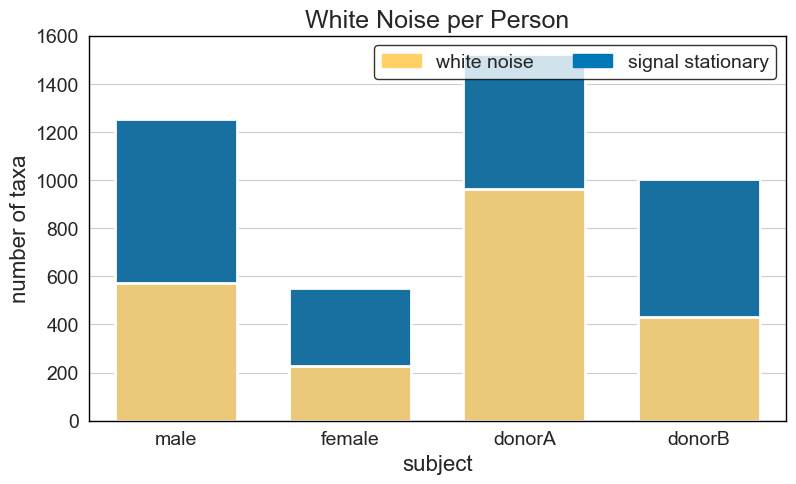

In [15]:
LongitudinalCharacteristics.plot_white_noise_per_person(df = WHITE_NOISE_DF)

# 2. STATIONARITY

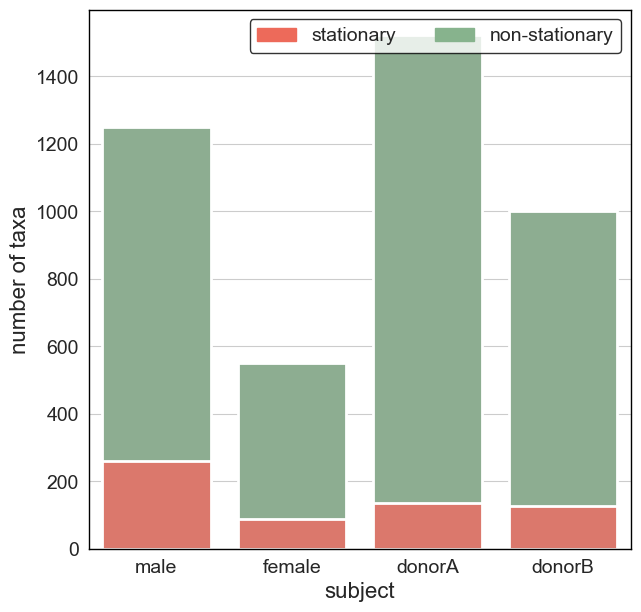

In [16]:
stationary_data = lch_object.prepare_stationarity_data(df)

LongitudinalCharacteristics.plot_stationarity_data(stationary_data)

# 3. TREND

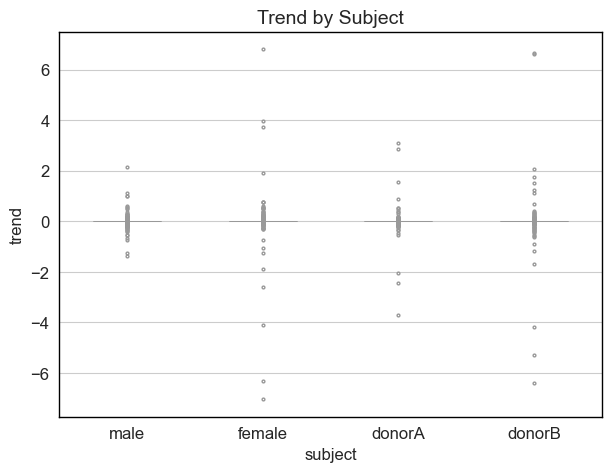

In [17]:
LongitudinalCharacteristics.plot_boxplot(
    df=df,
    x_var='subject',
    y_var='trend',
    xlabel='subject',
    ylabel='trend',
    fliersize = 2, width=.5,
    fig_title='Trend by Subject'
)

# 4. PREVALENCE

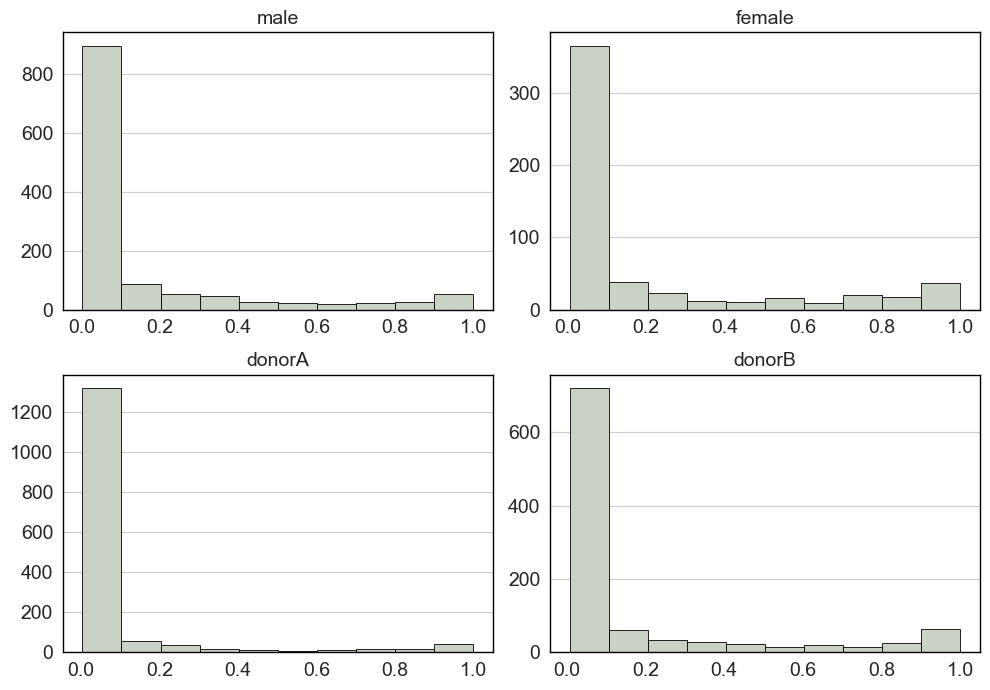

In [18]:
LongitudinalCharacteristics.plot_histogram(
    df=df,
    subjects=subjects,
    variable='prevalence'
)

# 5. AUTOCORRELATION

In [19]:
autocorr_df = pd.read_csv('./data/data_original/ts_charactericstics_tables/autocorrelation.csv', index_col = [0])

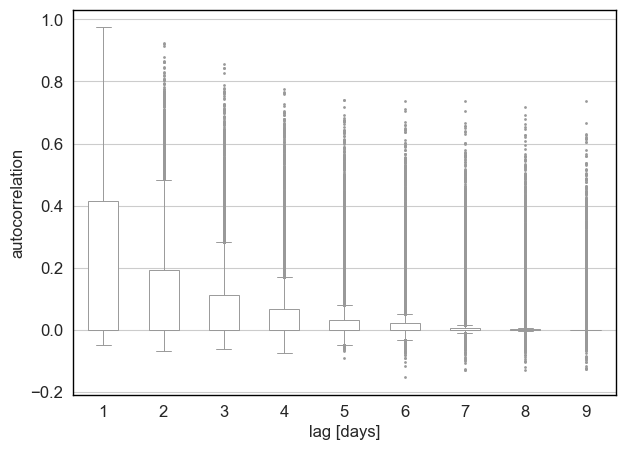

In [20]:
LongitudinalCharacteristics.plot_boxplot(
    df=autocorr_df,
    x_var='lag',
    y_var='acf_adj',
    hue_var='subject',
    xlabel='lag [days]',
    ylabel='autocorrelation',
    palette={'male':'#d36135', 
        'female':'#ffb400' ,
        'donorA':'#227c9d', 
        'donorB':'#7fb069'},
    legend_params={
        'fontsize': 10,
        'ncol': 4
    }
)

# 6. FEATURES HEATMAP

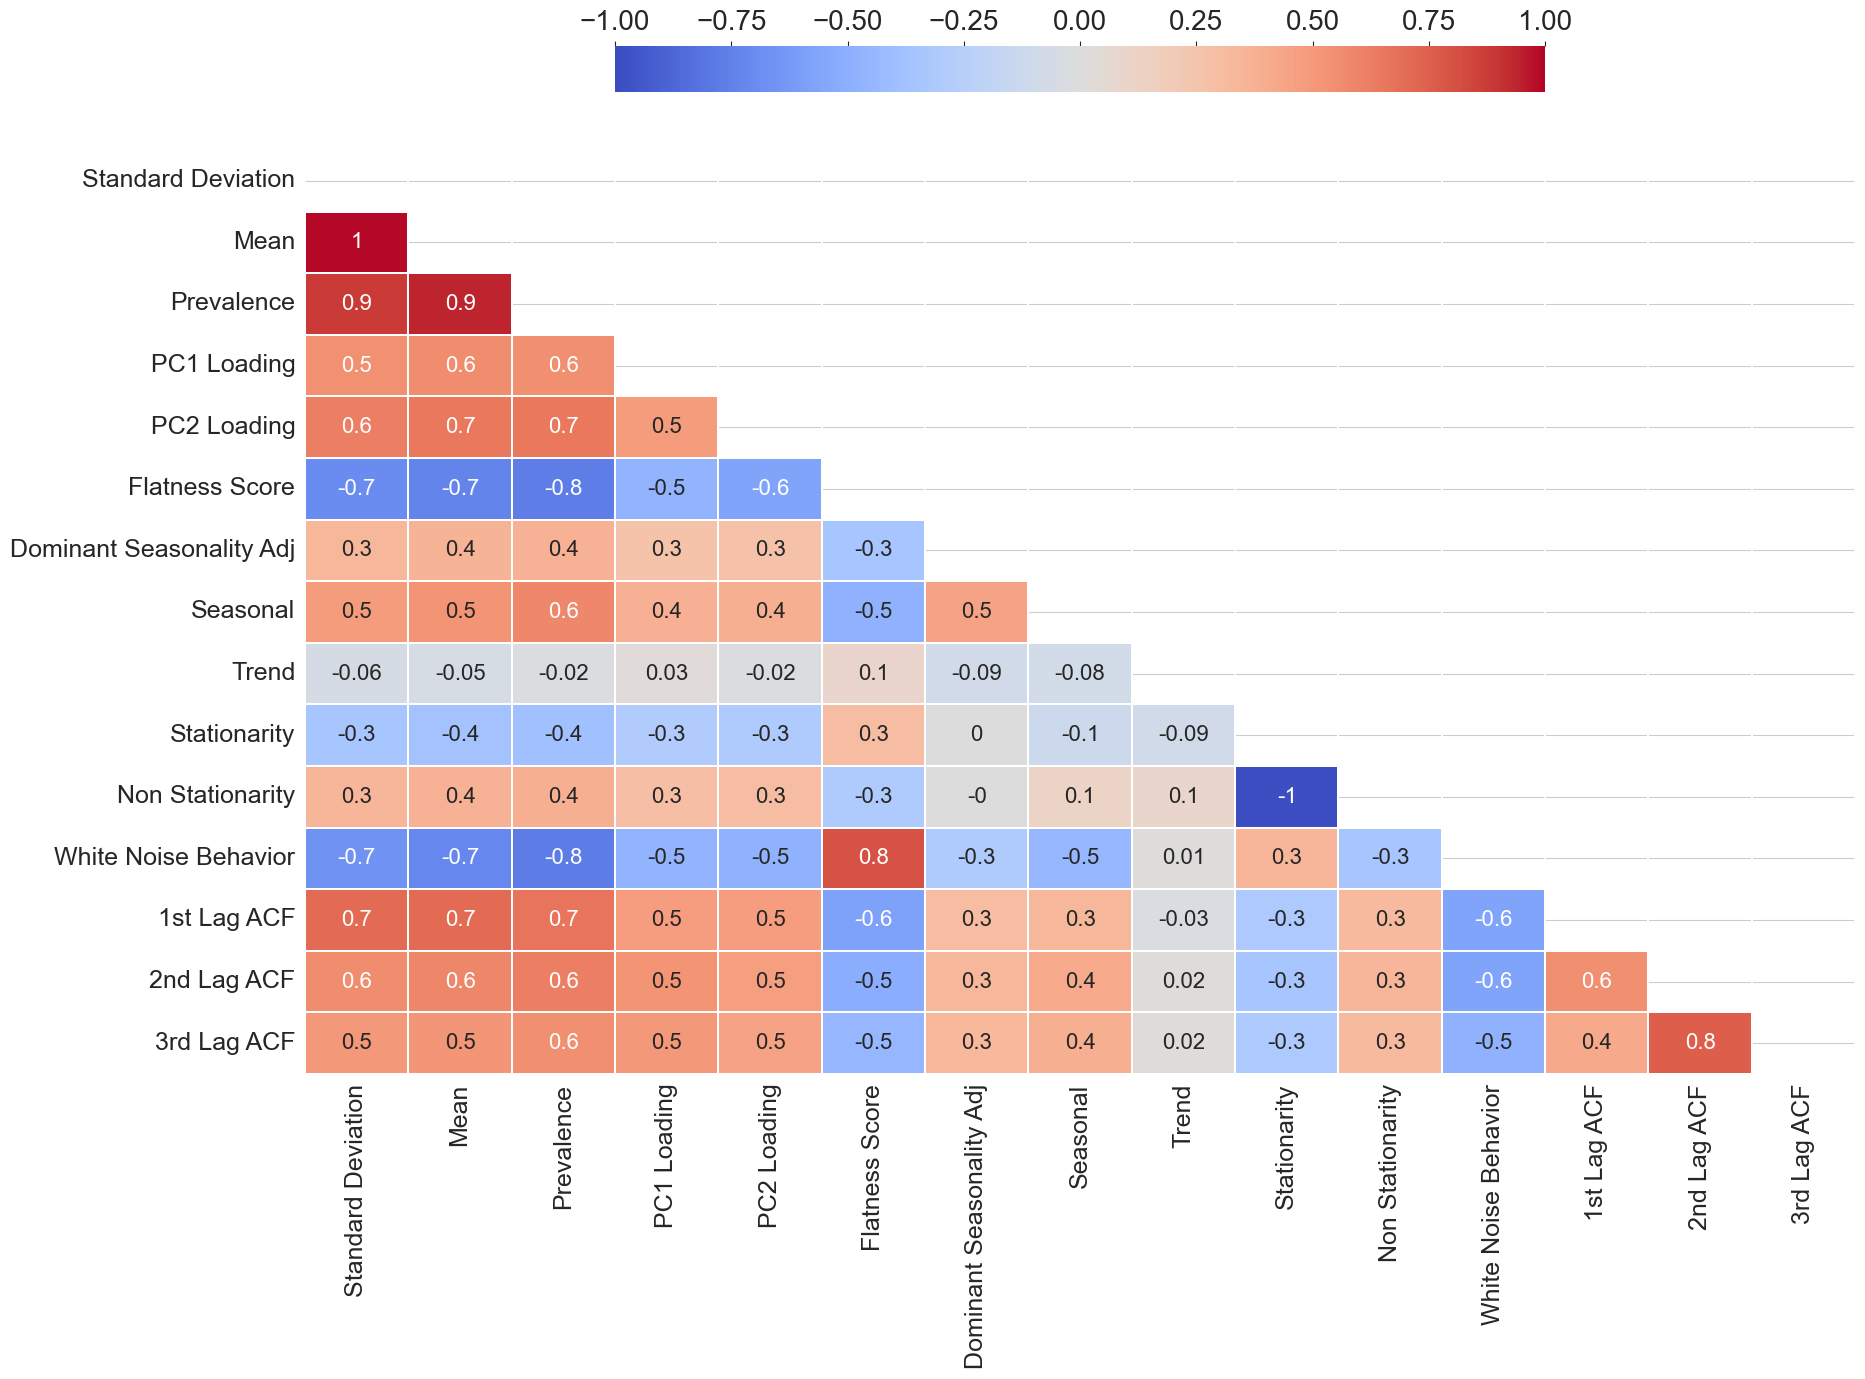

In [21]:
LongitudinalCharacteristics.plot_features_heatmap(df)